Anecdotes autours des prénoms
====

Les données peuvent être téléchargées sur [data.gouv.fr](https://www.data.gouv.fr/fr/datasets/fichier-des-prenoms-edition-2016/) (merci Vince B pour le format csv)

Ce notebook étudie différentes questions sur les prénoms :
* [Combien de lettres ont les prénoms ? Quels sont les plus long ?](#longueur)
* [Est-ce que les prénoms donnés sont de plus en plus courts ?](#plus_courts)
* [Où en est la mode des noms composés ? Quels sont les plus donnés ?](#noms_composes)
* [Est-ce que les gens nomment leurs enfants en fonction des stars ?](#star_system)
* [Quelles est la dynamique des prénoms qui sont à la fois des prénoms de garçons et de filles ?](#double_genre)


N'hésitez pas à profiter du côté collaboratif de github pour me faire parvenir vos idées, vos remarques et votre code !

In [1]:
import os
import pandas as pd

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

path = 'D:\data\prénom' 

In [2]:
for tab in ['nat2015']:
    path_file = os.path.join(path, tab + '.dbf')
    csv_file = os.path.join(path, tab + '.csv')
    nat = pd.read_csv(csv_file)
    nat['prenom'] = nat['preusuel']
    del nat['preusuel']


# on retire les XXX
nat = nat[nat.annais != 'XXXX']
nat['annais'] = nat['annais'].astype(int)
nat['genre'] = 'feminin'
nat['genre'][nat['sexe'] == 1] = 'masculin'
del nat['sexe']
nat = nat[nat['prenom'].notnull()]

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<a id='longueur'></a>
Longueurs des prénoms 
====

## L'état actuel

=> La moyenne est à 6,6 lettres par prénoms

*  Le petit pic à 15 correspond est dû aux 75 000 MARIE-CHRISTINE, aux 31 000 JEAN-CHRISTOPHE et au 28 000 MARIE-FRANÇOISE. A 14 lettres, les JEAN-SÉBASTIEN et les ANNE-CHARLOTTE sont 5 000, à 16 lettres, les MARIE-ANTOINETTE sont 7 500.

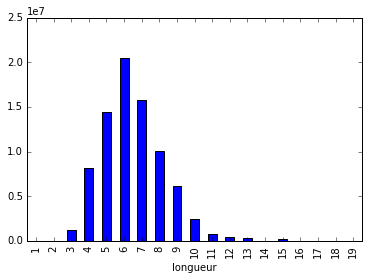

In [3]:
# taille des prénom
nat['longueur'] = nat['prenom'].str.len().astype(int)
nat = nat[nat['prenom'] != '_PRENOMS_RARES']
nat.groupby('longueur')['nombre'].sum().plot.bar()

In [4]:
# pour regarde les noms par taille
nat[nat['longueur'] == 15]['prenom'].nunique()
nat[nat['longueur'] == 16].groupby('prenom')['nombre'].sum().sort_values().tail()

prenom
MARGUERITE-MARIE     662.0
MARIE-EMMANUELLE    1172.0
MARIE-BERNADETTE    2244.0
PIERRE-ALEXANDRE    3146.0
MARIE-ANTOINETTE    7477.0
Name: nombre, dtype: float64

In [5]:
# les prenoms les plus long
print('Les noms les plus longs')
print(nat[nat.prenom.str.len() > 15]['prenom'].unique().tolist()[:9])
# c'est des noms composés

# les plus longs des plus longs
print('\n les plus longs des plus longs')
print(nat[nat.prenom.str.len() == 19]['prenom'].unique().tolist()[:9])

longueur_du_premier_nom = nat['prenom'].str.split('-').str[0].str.len().astype(int)
print('\n Les plus longs prénoms non-composés (13 lettres)')
print(nat[longueur_du_premier_nom == 13]['prenom'].unique().tolist())
print('\n Prénoms non-composés de 12 lettres')
print(nat[longueur_du_premier_nom ==12]['prenom'].unique().tolist())

Les noms les plus longs
['ALEXANDRE-BENOÎT', 'ANTOINE-FRANÇOIS', 'CHARLES-ALEXANDRE', 'CHARLES-EMMANUEL', 'CHARLES-FRANÇOIS', 'CHARLES-FRÉDÉRIC', 'CHARLES-GUILLAUME', 'CHARLES-PHILIPPE', 'CHRISTIAN-JACQUES']

 les plus longs des plus longs
['FRANÇOIS-CHRISTOPHE', 'GUILLAUME-ALEXANDRE']

 Les plus longs prénoms non-composés (13 lettres)
['ABDOURAHAMANE', 'ABDOURRAHMANE', 'JACQUEMINETTE']

 Prénoms non-composés de 12 lettres
['ABDELDJALLIL', 'ABDELGHAFOUR', 'ABDELMOUMENE', 'ABDELMOUNAIM', 'ABDELRAHMANE', 'ABDELRAHMENE', 'ABDERRAHMANE', 'ABDERRAHMENE', 'ABDERRHAMANE', 'ABDOURAHMANE', 'ABDOURRAHMAN', 'APPOLLINAIRE', 'CHRISTOPHEUR', 'HERMENEGILDE', 'KONSTANTINOS', 'MASSIMILIANO', 'MICHELANGELO', 'SCHOLASTIQUE', 'ANNONCIATION', 'CATHERINETTE', 'CHRISTABELLE', 'DOMINIQUETTE', 'EMERENTIENNE', 'FOUNEMOUSSOU', 'FRANCILLETTE', 'GUILLAUMETTE', 'MAXIMILIENNE', 'PHILADELPHIA', 'PURIFICACION', 'PURIFICATION', 'SCHEHERAZADE', 'SCHÉHÉRAZADE', 'SYMPHORIENNE']


<a id='plus_courts'></a>
## Est-ce que l'on donne des noms de plus en plus courts ?

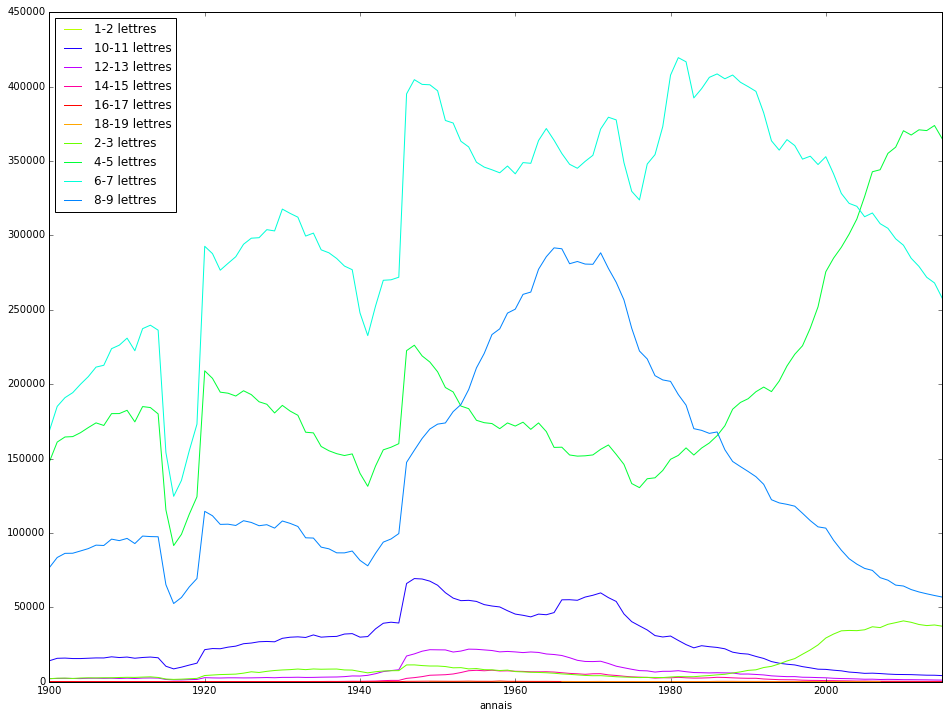

In [6]:
import colorsys
# des prénoms de plus en plus courts ?
grouped_longueur = 2*(nat['longueur'] // 2)
grouped_longueur[grouped_longueur == 0] = 1

nat['grouped_longueur'] = grouped_longueur.astype(str) + '-' + (grouped_longueur + 1).astype(str) + ' lettres'


by_long = nat.groupby(['annais', 'grouped_longueur'])['nombre'].sum()
by_long = pd.DataFrame(by_long).reset_index()
# print(by_long)
#by_long.plot(stacked=True, kind='bar')

fig, ax = plt.subplots(figsize=(16,12))
idx = 0
for long, group in by_long.groupby('grouped_longueur'):
    color = colorsys.hsv_to_rgb((3 + float(long.split('-')[0]))*19/360, 1., 1.)
    group.plot(x='annais', y='nombre', kind='line', ax=ax, label = long,
               color= color)

### Oui ! Les prénoms de 3 lettres augmentent depuis les années 2000. Ceux de 4 et 5 lettres aussi beaucoup depuis les années 1980 pendant que les noms de 6 lettres et plus baissent.

Sur le graphique ci-dessous, on voit que la longueur moyenne des prénoms était de 7,2 lettres en
1960, c'est 5,4 en 2015.

L'augmentation du milieu du siècle est du à la diffusion des noms-composés (voir plus bas).

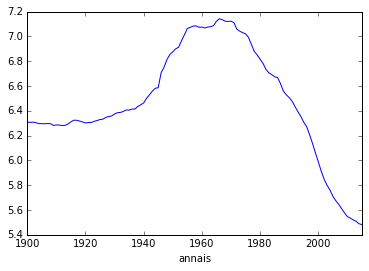

In [7]:
longueur_moyenne_par_annee = nat.groupby(['annais']).apply(
    lambda x: (x['longueur']*x['nombre']).sum()/x['nombre'].sum()
)
longueur_moyenne_par_annee.plot()

<a id='noms_composes'></a>

# Histoire des noms composés

False    519086
True      37697
Name: compose, dtype: int64


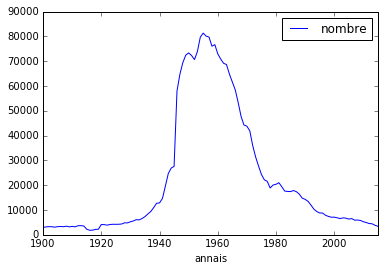

In [8]:
nat['compose'] = nat['prenom'].str.contains('-')
print(nat['compose'].value_counts())
nat[nat['compose']]
composes = nat[nat['compose']]
composes.groupby('annais').sum().reset_index().plot(x='annais', y='nombre')


In [9]:
# qui sont les rocks star des noms composés ?

composes['nom1'] = composes['prenom'].str.split('-').str[0]
composes['nom2'] = composes['prenom'].str.split('-').str[1]

print('\n Les 10 prénoms composés les plus répandus')
print(composes.groupby('prenom')['nombre'].sum().sort_values(ascending=False).head(10))

print('\n Les 10 premières partie de prénoms composés les plus répandus')
print(composes.groupby('nom1')['nombre'].sum().sort_values(ascending=False).head(10))

print('\n Les 10 secondes partie de prénoms composés les plus répandus')
print(composes.groupby('nom2')['nombre'].sum().sort_values(ascending=False).head(10))

print("\n Remarque : Trois prénoms ont trois mots. Il s'agit de", composes[composes['prenom'].str.split('-').str[2].notnull()]['prenom'].unique())



 Les 10 prénoms composés les plus répandus
prenom
JEAN-PIERRE      213143.0
JEAN-CLAUDE      172142.0
JEAN-LUC         116647.0
ANNE-MARIE        99695.0
JEAN-FRANÇOIS     99024.0
JEAN-MARC         90144.0
MARIE-THÉRÈSE     88345.0
JEAN-PAUL         86843.0
JEAN-MARIE        86223.0
JEAN-MICHEL       85960.0
Name: nombre, dtype: float64

 Les 10 premières partie de prénoms composés les plus répandus
nom1
JEAN        1367942.0
MARIE        838653.0
ANNE         198247.0
PIERRE        54053.0
LOU           14617.0
ROSE          13029.0
FRANÇOIS       9171.0
MOHAMED        9060.0
MARC           8609.0
PAUL           6827.0
Name: nombre, dtype: float64

 Les 10 secondes partie de prénoms composés les plus répandus
nom2
PIERRE      246261.0
CLAUDE      232592.0
MARIE       217482.0
LUC         117308.0
FRANÇOIS    101262.0
MARC         90365.0
PAUL         89343.0
THÉRÈSE      88642.0
LOUIS        86760.0
MICHEL       86688.0
Name: nombre, dtype: float64

 Remarque : Trois prénoms ont troi

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<a id='star_system'></a>

# Les prénoms donnés sont-ils influencés par les stars du moment ?

On regare Zinedine, Alizée (et Lolita :) ), Karl, Omar, ou encore BARACK 

In [10]:
def plot_prenom_startswith(debut_prenom):
    prenom_de_star = nat.prenom.str.startswith(debut_prenom)
    print(nat.prenom[prenom_de_star].unique())
    nat[prenom_de_star].groupby('annais')['nombre'].sum().plot(x='annais', y='nombre')

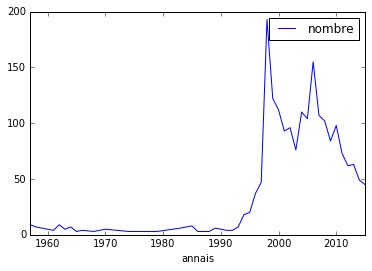

In [11]:
# Effet Zizou en 1998 ( avec un pic à 200)
nat.prenom.value_counts()
nat[nat.prenom == "ZINEDINE"].plot(x='annais', y='nombre')


['ALIZÉ' 'ALIZÉA' 'ALIZÉE']
['LOLITA']


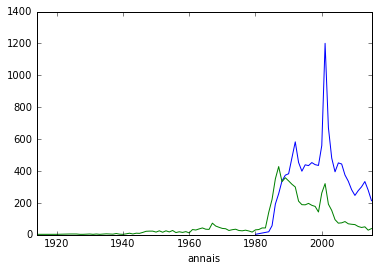

In [12]:
# Alizé sort son tube Lolita en 2000 
prenom_de_star = nat.prenom.str.startswith('ALIZÉ')
print(nat.prenom[prenom_de_star].unique())
nat[prenom_de_star].groupby('annais')['nombre'].sum().plot(x='annais', y='nombre')

prenom_de_star = nat.prenom.str.startswith('LOLIT')
print(nat.prenom[prenom_de_star].unique())
nat[prenom_de_star].groupby('annais')['nombre'].sum().plot(x='annais', y='nombre')

['BARA' 'BARAA' 'BARACK' 'BARAKA' 'BARAN']


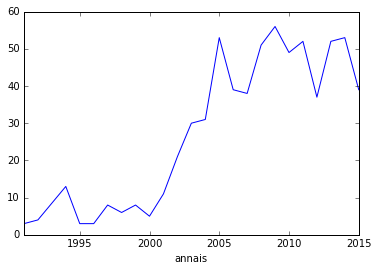

In [13]:
# Barack Obama 
plot_prenom_startswith('BARA')

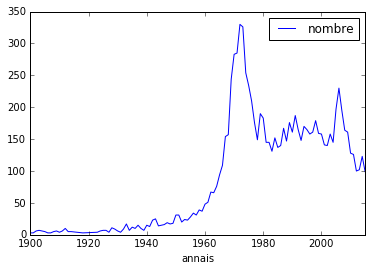

In [14]:
# L'étonnant prénom KARL : trop allemand avant 1968 et hommage à Karl Marx ensuite ?
# Notez un petit pic en 2006
nat[nat.prenom == "KARL"].plot(x='annais', y='nombre')

['OMAR' 'OMARION']


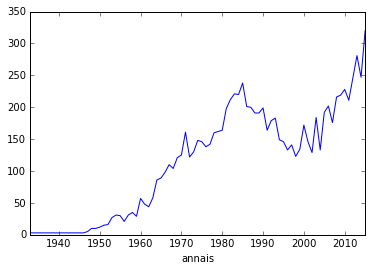

In [15]:
# La folle histoire du prénom Omar.
# C'est mon interprétation mais il semble il y avoir une tendance de fond, ralentie par l'épisode "Omar m'a tuer" que la bonne humeur
# d'Omar Sy fait oublier

plot_prenom_startswith('OMAR')

<a id='double_genre'></a>

# Les prénoms qui sont à la fois des prénoms de filles et de garçons

Des histoires très différentes. Dominique a été donné à peu près de la même façon aux filles et aux garçons. 
Camille était plutôt masculin au début du siècle et est devenu plutôt féminin. Evolution inverse avec le prénom EDEN qui est peut-être boosté par la popularité du joueur de foot EDEN HAZAR pour les garçons plus que pour les filles.

Dans les prénoms "unisexe" les plus donnés, figure Charlie qui a connu une baisse très forte en 2015.


In [16]:
# prénom des deux genres
genres = nat.groupby('prenom')['genre'].nunique()
double_genre = genres[genres == 2]
double_genre = double_genre.index.tolist()
# double_genre.remove("_PRENOMS_RARES")
double_genre = nat[nat['prenom'].isin(double_genre)]

In [17]:
gp = double_genre.groupby(['prenom', 'genre'])['nombre'].sum()
ratio = gp.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))

In [18]:
condtition_mitige = (ratio > 20) & (ratio < 80)
mitige = ratio[condtition_mitige].reset_index()
list_mitige = mitige['prenom']
genre_mitige = nat[nat['prenom'].isin(list_mitige)]
genre_mitige.groupby('prenom')['nombre'].sum().sort_values(ascending=False).head(10)


prenom
DOMINIQUE    409855.0
CAMILLE      267075.0
ALIX          28267.0
DANY          25303.0
JESSY         16153.0
CHARLIE       15936.0
EDEN          15418.0
SASHA         11737.0
LEONCE         9245.0
LOÏS           8376.0
Name: nombre, dtype: float64

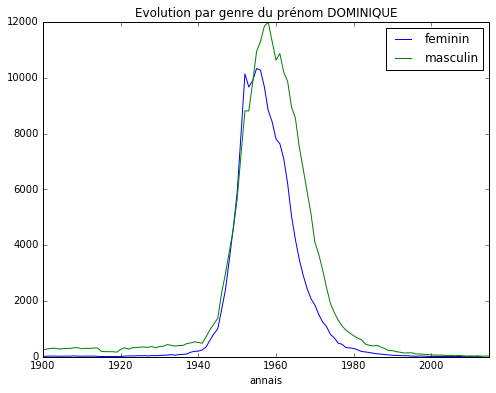

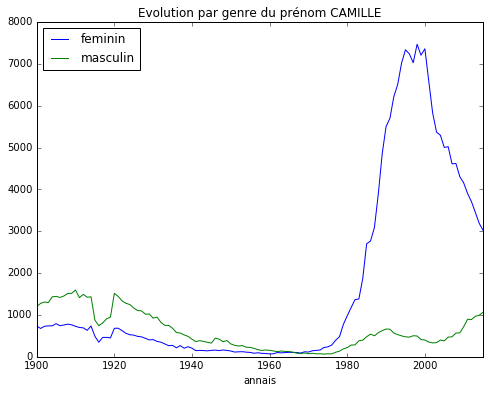

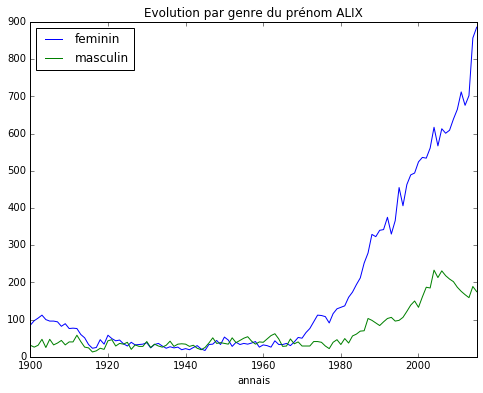

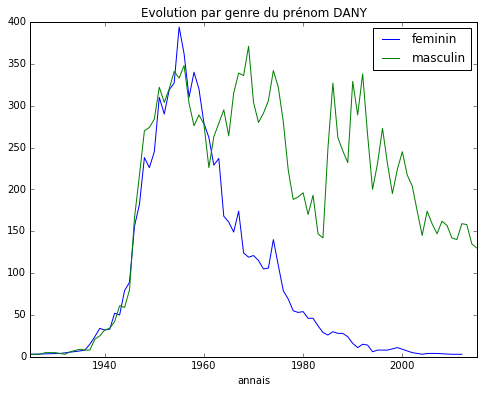

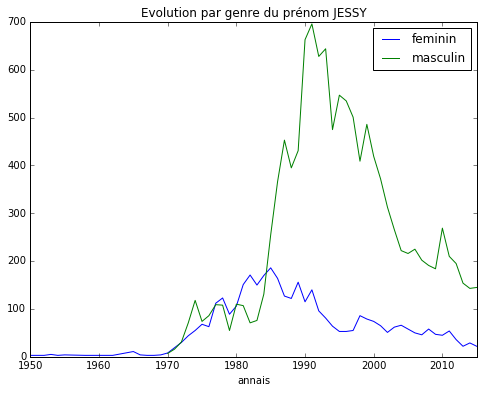

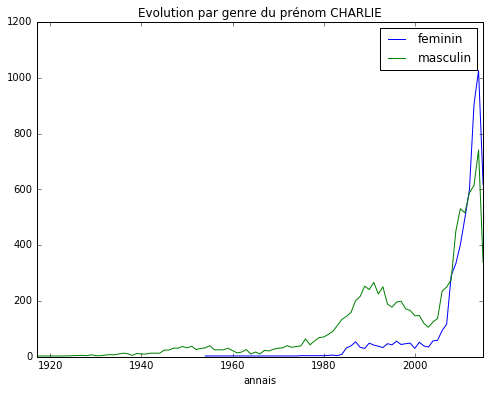

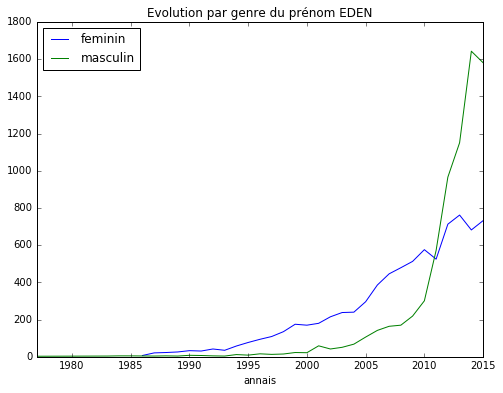

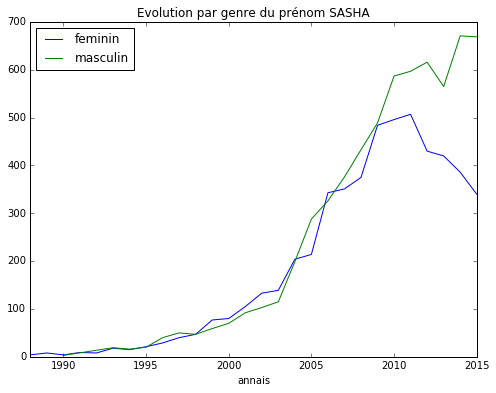

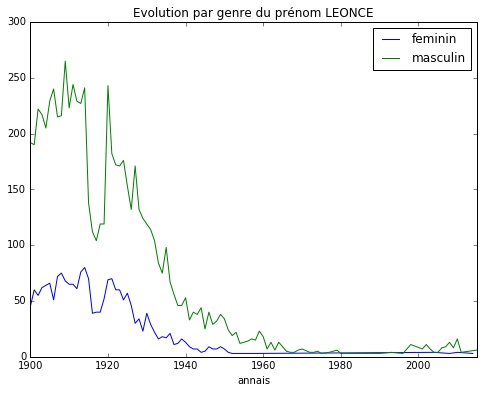

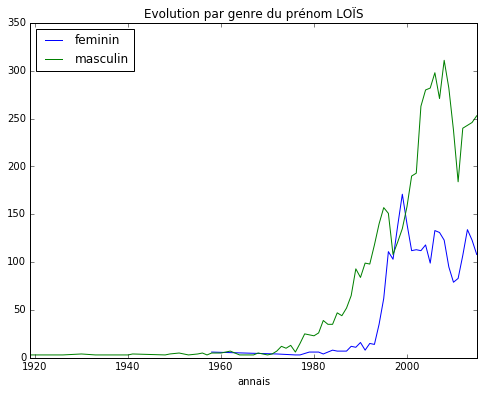

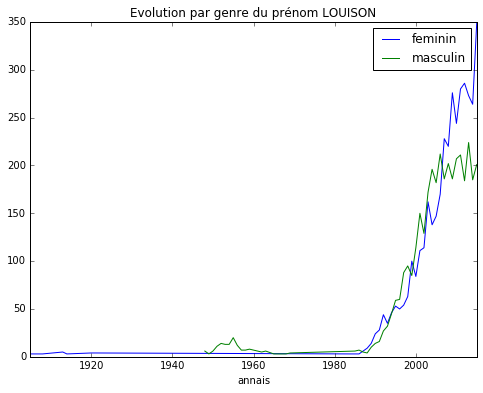

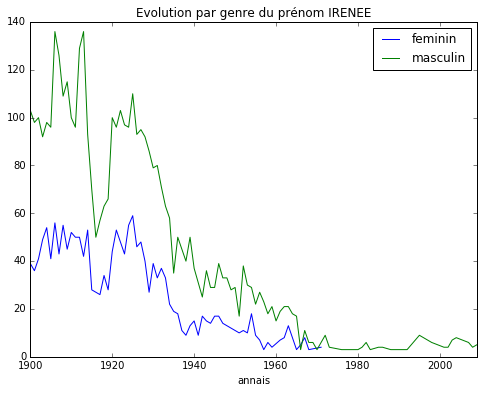

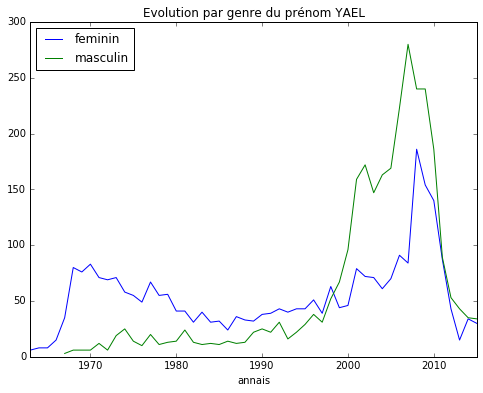

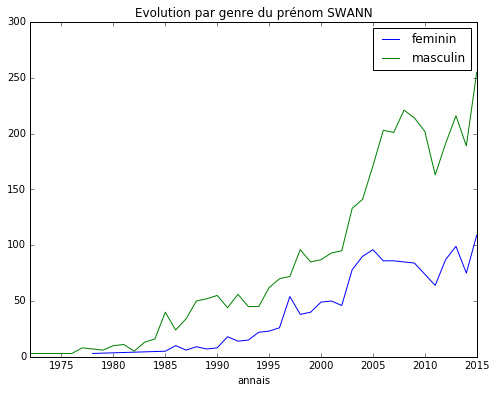

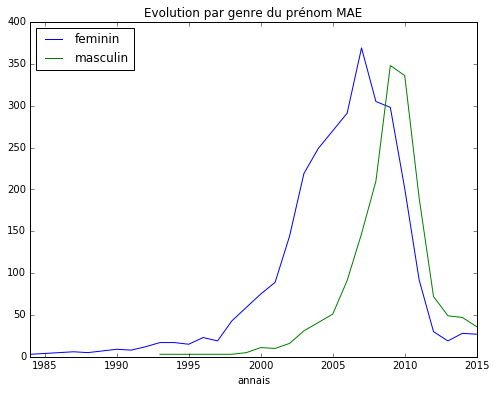

In [19]:
def plot_prenom(prenom):
    fig, ax = plt.subplots(figsize=(8,6))
    prenom_tab = nat[nat.prenom == prenom]
    title = "Evolution par genre du prénom {}".format(prenom)
    # print(prenom_tab)
    #print(prenom, prenom_tab.groupby('genre')['nombre'].sum())
    grp = prenom_tab.groupby('genre')
    for label, data in grp:
        data.plot(x='annais', y='nombre', kind='line', ax=ax, title=title, label=label)

for prenom in genre_mitige.groupby('prenom')['nombre'].sum().sort_values(ascending=False).index.tolist()[:15]:
    plot_prenom(prenom)